### 다층 퍼셉트론(MultiLayer Perceptron, MLP)

단층 퍼셉트론의 형태에서 은닉층이 1개 이상 추가된 신경망을 다층 퍼셉트론(MLP)라고함

다층 퍼셉트론은 Feed Forward Neural Nerwork(FFNN)의 기본적인 형태임

FFNN은 입력층에서 출력층으로 오직 한 방향으로만 연산 방향이 정해져 있는 신경망

#### 1. 케라스의 texts_to_matrix() 이해하기

In [3]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer


In [4]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [6]:
print(tokenizer.texts_to_matrix(texts, mode = 'count'))
# texts_to_matrix의 입력으로 texts를 넣고, 모드는 'count'
# 문서 단어 행렬(Documnet-Term Matrix, DTM) 생성

# 각 단어에 부여되는 인덱스는 1부터 시작하는 반면에 완성되는 행렬의 인덱스는 0부터
# 인덱스 0에는 그 어떤 단어도 할당되지 않았기 때문.

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [7]:
# DTM은 bag of words를 기반으로 하므로 단어 순서 정보는 보존 X
# 사실 더 구체적으로는 4개의 모든 모드에서 단어 순서 정보는 보존 X
print(tokenizer.texts_to_matrix(texts, mode = 'binary'))

# DTM과 결과가 매우 유사해보이지만, binary모드는 해당 단어가 존재하는지만 관심 O

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [8]:
print(tokenizer.texts_to_matrix(texts, mode = 'tfidf').round(2)) # 둘째 자리까지 반올림하여 출력

# tfidf 모드는 TF-IDF 행렬을만듬. 근데 여기서 기존의 식이랑 계산법이 조금 다른데
# 암튼 TF-IDF의 기존 의도를 갖고 있다고 이해하면됨.

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


*** TF-IDF(Term Frequency - Inverse Documnet Frequency)
가중치임. 여러 문서로 이루어진 문서군이 있을 때 어떤 단어가 특정 문서 내에서
얼마나 중요한 것인지를 나타내는 통계적인 수치.

문서의 핵심어를 추출하거나, 검색 엔진에서 검색 결과의 순위를 결정하거나,
문서들 사이의 비슷한 정도를 구하는 등의 용도로 사용 가능.

TF(Term Frequency)
TF는 어떤 단어가 특정 문서에 얼마나 많이 쓰였는지 빈도를 나타내줌.
즉 많이 쓰인 단어가 중요하다는 가정을 전제로 한 수치

DF(Documnet Frequency)
DF는 특정 단어의, 나타나는 문서수를 의미합니다.
DF가 클수록 다수의 문장에서 쓰이는 단어라고 할 수 있음.
(정리하자면 TF는 단어의 빈도를, DF는 문서의 빈도를 의미합니다.)

IDF(Inverse Documnet Frequency)
IDF는 전체 문서수를 해당 단어의 DF로 나눈 뒤 로그를 취해준 값.
IDF가 클수록 특이한 다어임.
DF에 Inverse를 해주는 의미로 DF의 역수를 의미함.
역수를 취하게 되면 원래의 큰 값들을 작은 값으로 줄이는 효과를 낼 수 있음.
이렇게 IDF는 많이 등자하는 단어를 약간의 패널티를 줄 수 있기 떄문에 IDF라고 부르게됨.

In [9]:
print(tokenizer.texts_to_matrix(texts, mode = 'freq').round(2))
# 둘째 자리까지 반올림하여 출력

# freq 모드는 각 문서에서의 각 단어의 등장 횟수를 분자로
# 각 문서의 크기(각 문서에서 등장한 모든 단어의 개수의 총합)를 분모로 하는 표현방법

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


#### 2. 20개의 뉴스 그룹(Twenty Newsgroups) 데이터에 대한 이해

In [11]:
# 사이킷런에서는 20개의 다른 주제를 가진 18846개의 뉴스 그룹 이메일 데이터를 제공

import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [12]:
newsdata = fetch_20newsgroups(subset = 'train')

In [13]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [15]:
# 이 중 실제로 사용할 속성은 이메일 본문인 data와
# 메일이 어떤 주제인지 기재된 숫자 레이블인 target

print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))

print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

훈련용 샘플의 개수 : 11314
총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [19]:
# 목적은 테스트 데이터에서 이메일 본문을 보고 20개의 주제 중 어떤 주제인지를 맞추는 것입니다. 

print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))

첫번째 샘플의 레이블 : 7
7번 레이블이 의미하는 주제 : rec.autos


In [20]:
print(newsdata.data[0]) # 첫번쨰 샘플 출력

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [21]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]
# 메일 본문에 해당하는 email열과 레이블에 해당되는 target 열, 2개의 열로 구성된 데이터프레임이 생성

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


In [24]:
# Null 값을 가진 샘플이 있는지 확인
data.isnull().values.any()

False

In [25]:
# 중복 제거
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


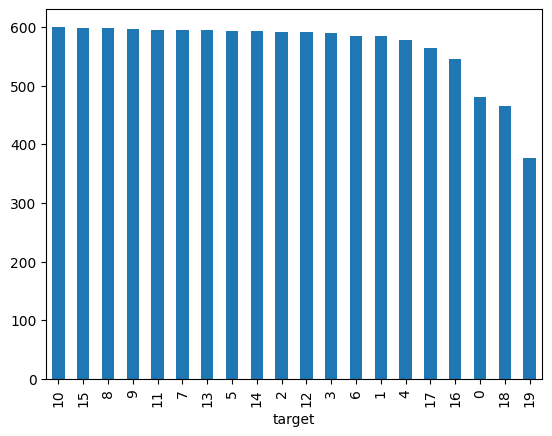

In [26]:
# 레이블 값의 분포
data['target'].value_counts().plot(kind='bar');

In [28]:
# 각 레이블이 몇 개 있는지 구체적인 수치로 확인
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [29]:
# 훈련데이터와 테스트 데이터 분리
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

In [30]:
# 최대 단어 개수를 정의, 빈도수가 가장 높은 상위 vocab_size 개수만큼의 단어를 사용
vocab_size = 10000
num_classes = 20

In [31]:
def prepare_data(train_data, test_data, mode): # 전처리 함수
    tokenizer = Tokenizer(num_words = vocab_size) # vocab_size 개수만큼의 단어만 사용한다.
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data, mode=mode) # 샘플 수 × vocab_size 크기의 행렬 생성
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode) # 샘플 수 × vocab_size 크기의 행렬 생성
    return X_train, X_test, tokenizer.index_word


In [32]:
# binary 모드로 변환
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary')
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

In [33]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [34]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic
